# Austrian energy system Tutorial Part 2: Further analysing an Energy Model


**Pre-requisites**
- You have the *MESSAGEix* framework installed and working
- You have run Austrian energy system baseline scenario (``austria.ipynb``) and solved it successfully

**Introduction**

In this notebook, we load the previously built model of the Austrian energy system to do some further analysis. The aim of this tutorial is to illustrate the workflow for subsequent analysis after the initial model development.

## Setup

In [1]:
# load required packages 
import pandas as pd

from matplotlib.pyplot import style
import matplotlib_inline

import ixmp as ix
import message_ix
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
style.use("ggplot")

/tmp/ipykernel_3186/1049668983.py:9: DeprecationWarning: Importing from 'message_ix.reporting' is deprecated and will fail in a future version. Use 'message_ix.report'.
  from message_ix.reporting import Reporter
Cannot redefine 'y' (<class 'pint.delegates.txt_defparser.plain.UnitDefinition'>)


In [2]:
model = "Turkey energy model"
scen = "baseline"

In [3]:
# launch the IX modeling platform using the local default databases
mp = ix.Platform(name="default", jvmargs="-Duser.language=en")

2025-04-06 12:17:18,621  INFO at.ac.iiasa.ixmp.Platform:165 - Welcome to the IX modeling platform!
2025-04-06 12:17:18,625  INFO at.ac.iiasa.ixmp.Platform:166 -  connected to database 'jdbc:hsqldb:file:/home/ggungor/.local/share/ixmp/localdb/default' (user: ixmp)...


In [4]:
# try:
    # Load the Austrian energy model
#    scenario = message_ix.Scenario(mp, model, scen)
#except ValueError:
    # Create the model from scratch
#    from message_ix.testing import make_austria
#    scenario = make_austria(mp)

In [5]:
# Load the Turkey energy model
scenario = message_ix.Scenario(mp, model, scen)

In [6]:
# Remove any existing solution
try:
    scenario.remove_solution()
except ValueError:
    pass

# Solve
scenario.solve()

--- Warning: The GAMS version [48.5.0] differs from the API version [24.8.3].
--- Job MESSAGE_run.gms Start 04/06/25 12:18:05 48.5.0 5f05ac2f LEX-LEG x86 64bit/Linux
--- Applying:
    /home/ggungor/Downloads/gams48.5_linux_x64_64_sfx/gmsprmun.txt
--- GAMS Parameters defined
    Input /home/ggungor/miniconda3/envs/message_env/lib/python3.8/site-packages/message_ix/model/MESSAGE_run.gms
    ScrDir /home/ggungor/miniconda3/envs/message_env/lib/python3.8/site-packages/message_ix/model/225a/
    SysDir /home/ggungor/Downloads/gams48.5_linux_x64_64_sfx/
    LogOption 4
    --in /home/ggungor/miniconda3/envs/message_env/lib/python3.8/site-packages/message_ix/model/data/MsgData_Turkey_energy_model_baseline.gdx
    --out /home/ggungor/miniconda3/envs/message_env/lib/python3.8/site-packages/message_ix/model/output/MsgOutput_Turkey_energy_model_baseline.gdx
    --iter /home/ggungor/miniconda3/envs/message_env/lib/python3.8/site-packages/message_ix/model/output/MsgIterationReport_Turkey_energy_mod

2025-04-06 12:18:10,957 ERROR at.ac.iiasa.ixmp.objects.Scenario:1691 - variable 'I' not found in gdx!
2025-04-06 12:18:10,962 ERROR at.ac.iiasa.ixmp.objects.Scenario:1691 - variable 'C' not found in gdx!


# Plotting Results

In [7]:
rep = Reporter.from_scenario(scenario)
prepare_plots(rep)

<IPython.core.display.Javascript object>

0             coal_ppl
1              gas_ppl
2              oil_ppl
3              bio_ppl
4            hydro_ppl
5             wind_ppl
6           geothermal
7         solar_pv_ppl
8               import
9     electricity_grid
10      low_efficiency
11     high_efficiency
12                hvac
dtype: object


<Axes: title={'center': 'Turkey Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

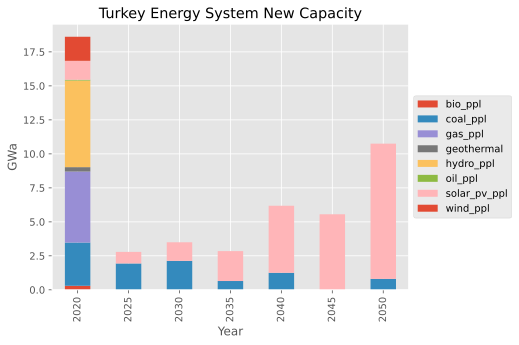

In [8]:
technologies = scenario.set("technology")
print(technologies)
plants = [
    "bio_ppl",
    "coal_ppl",
    "gas_ppl",
    "oil_ppl",
    "hydro_ppl",
    "solar_pv_ppl",
    "wind_ppl",
    "geothermal",
]

rep.set_filters(t=plants)
rep.get("plot new capacity")

<Axes: title={'center': 'Turkey Energy System New Capacity'}, xlabel='Year', ylabel='GWa'>

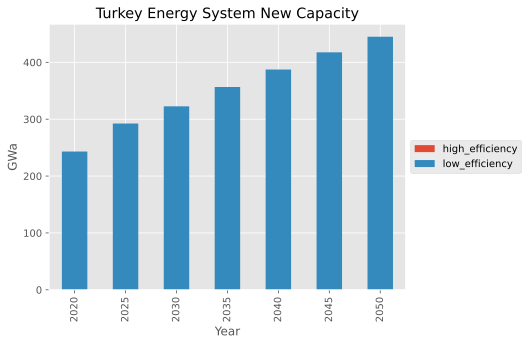

In [9]:
lights = ["low_efficiency", "high_efficiency"]

rep.set_filters(t=lights)
rep.get("plot new capacity")

<Axes: title={'center': 'Turkey Energy System Capacity'}, xlabel='Year', ylabel='GW'>

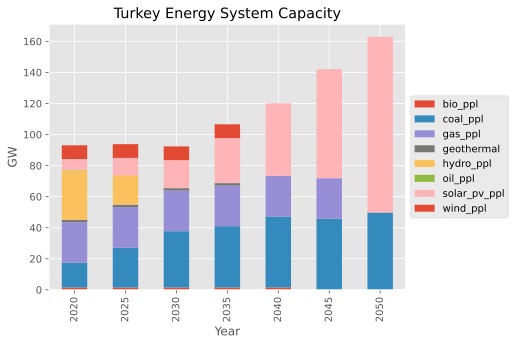

In [10]:
rep.set_filters(t=plants)
rep.get("plot capacity")

<Axes: title={'center': 'Turkey Energy System Capacity'}, xlabel='Year', ylabel='GW'>

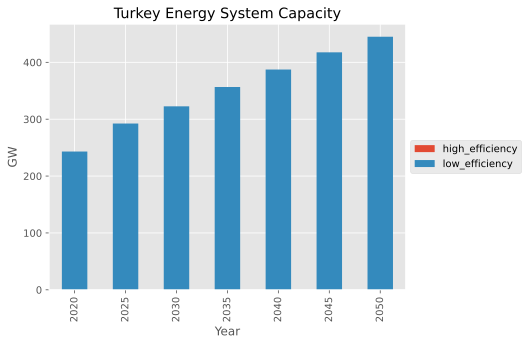

In [11]:
rep.set_filters(t=lights)
rep.get("plot capacity")

In [12]:
# Display the demands for some commodities
commodities = ["light_and_appliance", "hvac"]
scenario.par("demand", dict(commodity=commodities))

,node,commodity,level,year,time,value,unit
0,Turkey,hvac,useful,2020,year,5.194590,GWa
1,Turkey,hvac,useful,2025,year,6.245721,GWa
2,Turkey,hvac,useful,2030,year,6.892195,GWa
3,Turkey,hvac,useful,2035,year,7.618348,GWa
4,Turkey,hvac,useful,2040,year,8.274179,GWa
5,Turkey,hvac,useful,2045,year,8.919647,GWa
6,Turkey,hvac,useful,2050,year,9.504623,GWa
7,Turkey,light_and_appliance,useful,2020,year,24.320127,GWa
8,Turkey,light_and_appliance,useful,2025,year,29.241332,GWa
9,Turkey,light_and_appliance,useful,2030,year,32.268002,GWa


<Axes: title={'center': 'Turkey Energy System Demand'}, xlabel='Year', ylabel='GWa'>

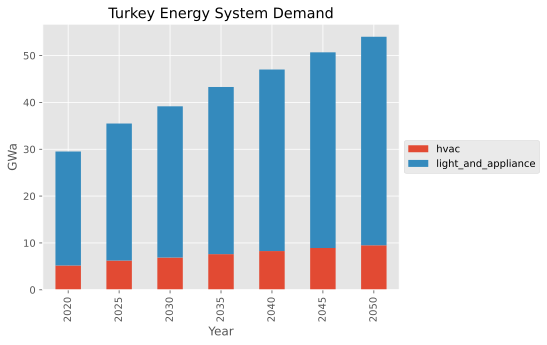

In [13]:
# Plot the values
rep.set_filters(t=None, c=commodities)
rep.get("plot demand")

<Axes: title={'center': 'Turkey Energy System Activity'}, xlabel='Year', ylabel='GWa'>

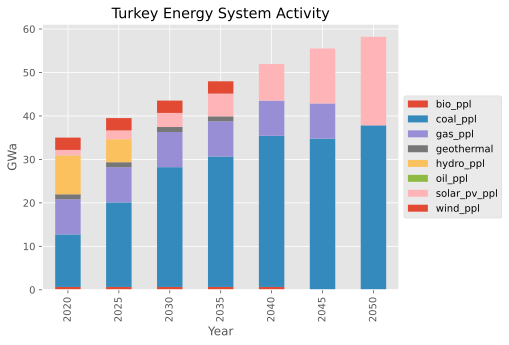

In [14]:
rep.set_filters(c=None, t=plants)
rep.get("plot activity")

<Axes: title={'center': 'Turkey Energy System Activity'}, xlabel='Year', ylabel='GWa'>

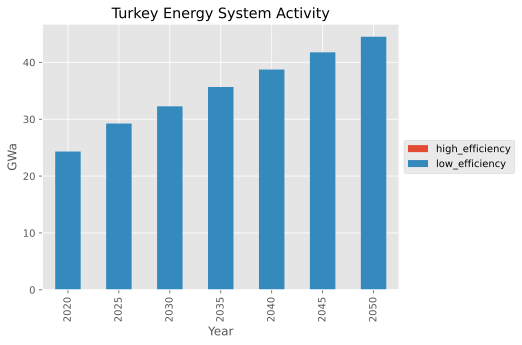

In [15]:
rep.set_filters(t=lights)
rep.get("plot activity")

<Axes: title={'center': 'Turkey Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

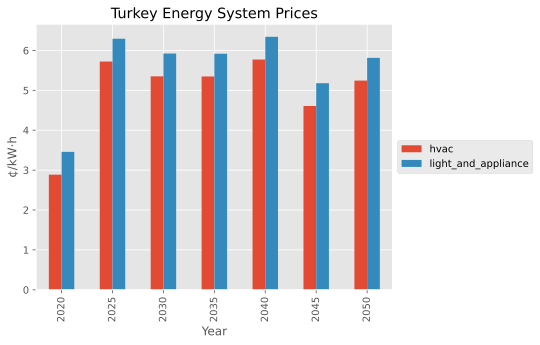

In [16]:
rep.set_filters(t=None, c=commodities)
rep.get("plot prices")

In [17]:
mp.close_db()